In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Step 1: Create a small dataset with clear sentiment labels
data = {
    'text': [
        'I love this movie', 
        'This movie is terrible', 
        'I really enjoyed this film', 
        'This film is awful', 
        'What a fantastic experience', 
        'I hated this film', 
        'This was a great movie', 
        'The film was not good', 
        'I am very happy with this movie', 
        'I am disappointed with this film'
    ],
    'label': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}

In [3]:
# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocess the text data
df['text'] = df['text'].str.lower()

In [4]:
# Step 3: Convert text data into a TF-IDF representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [5]:
# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(X.toarray())

TF-IDF Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.78223376 0.5172355  0.         0.         0.         0.
  0.34724312 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.5537218
  0.         0.43070289 0.         0.         0.6513674  0.
  0.28914994 0.         0.         0.         0.        ]
 [0.         0.         0.         0.62626343 0.         0.
  0.37188828 0.         0.         0.         0.         0.
  0.         0.         0.         0.62626343 0.         0.
  0.27800598 0.         0.         0.         0.        ]
 [0.         0.66338198 0.         0.         0.         0.
  0.39393005 0.         0.         0.         0.         0.56393529
  0.         0.         0.         0.         0.         0.
  0.29448336 0.         0.         0.         0.        ]
 [0.         0.   

In [6]:
# Print the feature names (words)
print("Feature Names (Words):")
print(vectorizer.get_feature_names_out())

Feature Names (Words):
['am' 'awful' 'disappointed' 'enjoyed' 'experience' 'fantastic' 'film'
 'good' 'great' 'happy' 'hated' 'is' 'love' 'movie' 'not' 'really'
 'terrible' 'the' 'this' 'very' 'was' 'what' 'with']


In [7]:
# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [8]:
# Step 5: Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predict on test data
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
print(f'Accuracy: {accuracy}\n')
print('Classification Report:')
print(report)

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



In [13]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[0 1]
 [0 1]]


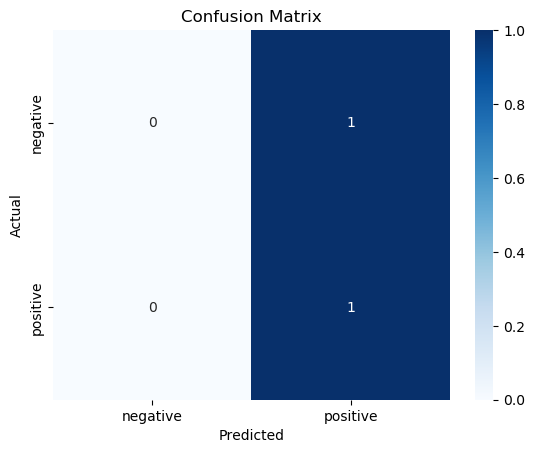

In [14]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Function to classify new user input and get polarity and subjectivity
def classify_and_analyze_input(new_input):
    new_input_lower = new_input.lower()
    new_input_vector = vectorizer.transform([new_input_lower])
    prediction = clf.predict(new_input_vector)[0]

    blob = TextBlob(new_input)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    return prediction, polarity, subjectivity

In [16]:
# Test the classification function with two sample inputs
sample_inputs = [
    "I absolutely loved this film, it was fantastic!",
    "The movie was not good and I did not enjoy it at all."
]

In [17]:
for i, sample in enumerate(sample_inputs):
    classification, polarity, subjectivity = classify_and_analyze_input(sample)
    print(f'Sample Input {i+1}: "{sample}"')
    print(f'Classification: {classification}')
    print(f'Polarity: {polarity}')
    print(f'Subjectivity: {subjectivity}\n')

Sample Input 1: "I absolutely loved this film, it was fantastic!"
Classification: negative
Polarity: 0.6
Subjectivity: 0.8500000000000001

Sample Input 2: "The movie was not good and I did not enjoy it at all."
Classification: negative
Polarity: -0.275
Subjectivity: 0.55

